Whether to give loan to a person or not based on the information .
Train the model.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
#load data set from github
df = pd.read_csv('LoanPrediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.shape

(614, 13)

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

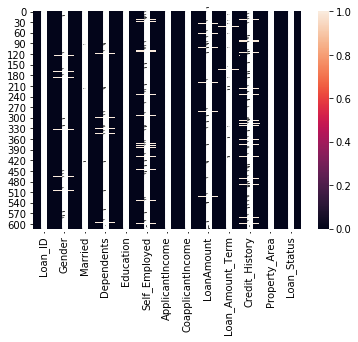

In [11]:
#data Visualization
#to check missing values
sns.heatmap(df.isnull(), annot=True)
plt.show()

In [12]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
#Filling missing value.
df.Gender = df.Gender.fillna('Male')

In [14]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
#Filling missing value.
df.Married = df.Married.fillna('Yes')

In [16]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df.Dependents = df.Dependents.fillna('0')

In [18]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [20]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [23]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [24]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [25]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [27]:
#first change all categorical data into 0,1,2... by labelEncoder
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
list1 = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed', 'Property_Area','Loan_Status']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
print(df.dtypes)

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object


In [28]:
df_corr = df.corr()
print(df_corr.head())

             Loan_ID    Gender   Married  Dependents  Education  \
Loan_ID     1.000000 -0.028029 -0.016013    0.051559   0.039442   
Gender     -0.028029  1.000000  0.364569    0.172914   0.045364   
Married    -0.016013  0.364569  1.000000    0.334216   0.012304   
Dependents  0.051559  0.172914  0.334216    1.000000   0.055752   
Education   0.039442  0.045364  0.012304    0.055752   1.000000   

            Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_ID          0.032874         0.016925           0.039211    0.035684   
Gender          -0.000525         0.058809           0.082912    0.107930   
Married          0.004489         0.051708           0.075948    0.147141   
Dependents       0.056798         0.118202           0.030430    0.163106   
Education       -0.010383        -0.140760          -0.062290   -0.166998   

            Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  
Loan_ID            -0.033028       -0.030603      -0.155416

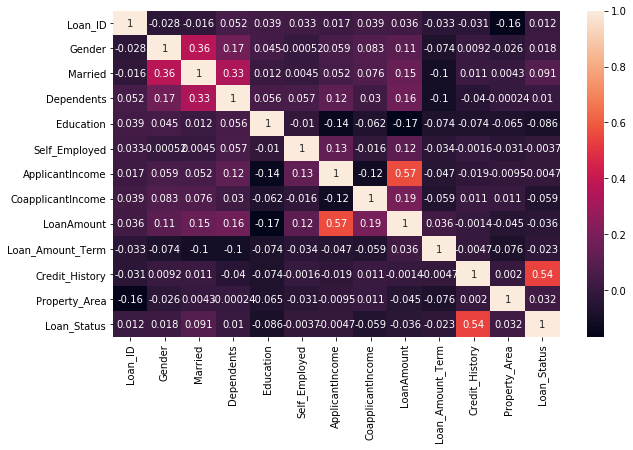

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True)

In [30]:
#Plotting outliers using plot.box
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Univariate and Bivariate Analysis

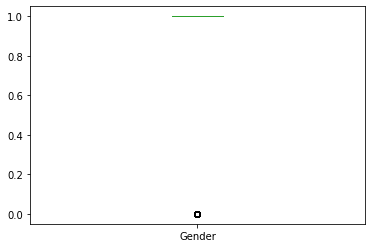

In [31]:
df['Gender'].plot.box()

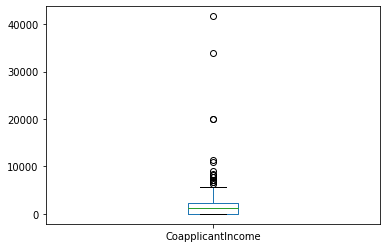

In [32]:
df['CoapplicantIncome'].plot.box()

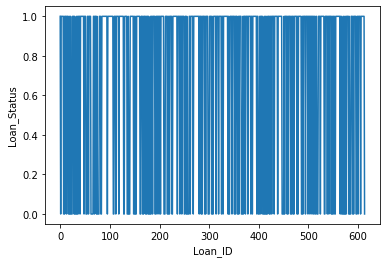

In [33]:
sns.lineplot(x='Loan_ID', y='Loan_Status' ,data=df)

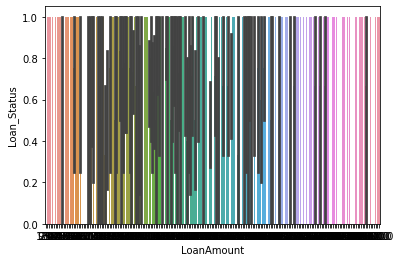

In [34]:
sns.barplot(x='LoanAmount', y='Loan_Status' ,data=df)

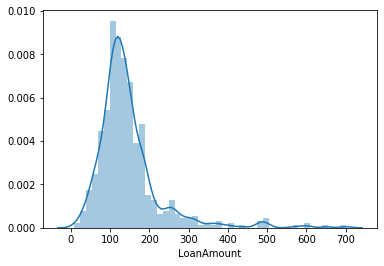

In [35]:
sns.distplot(df['LoanAmount'])

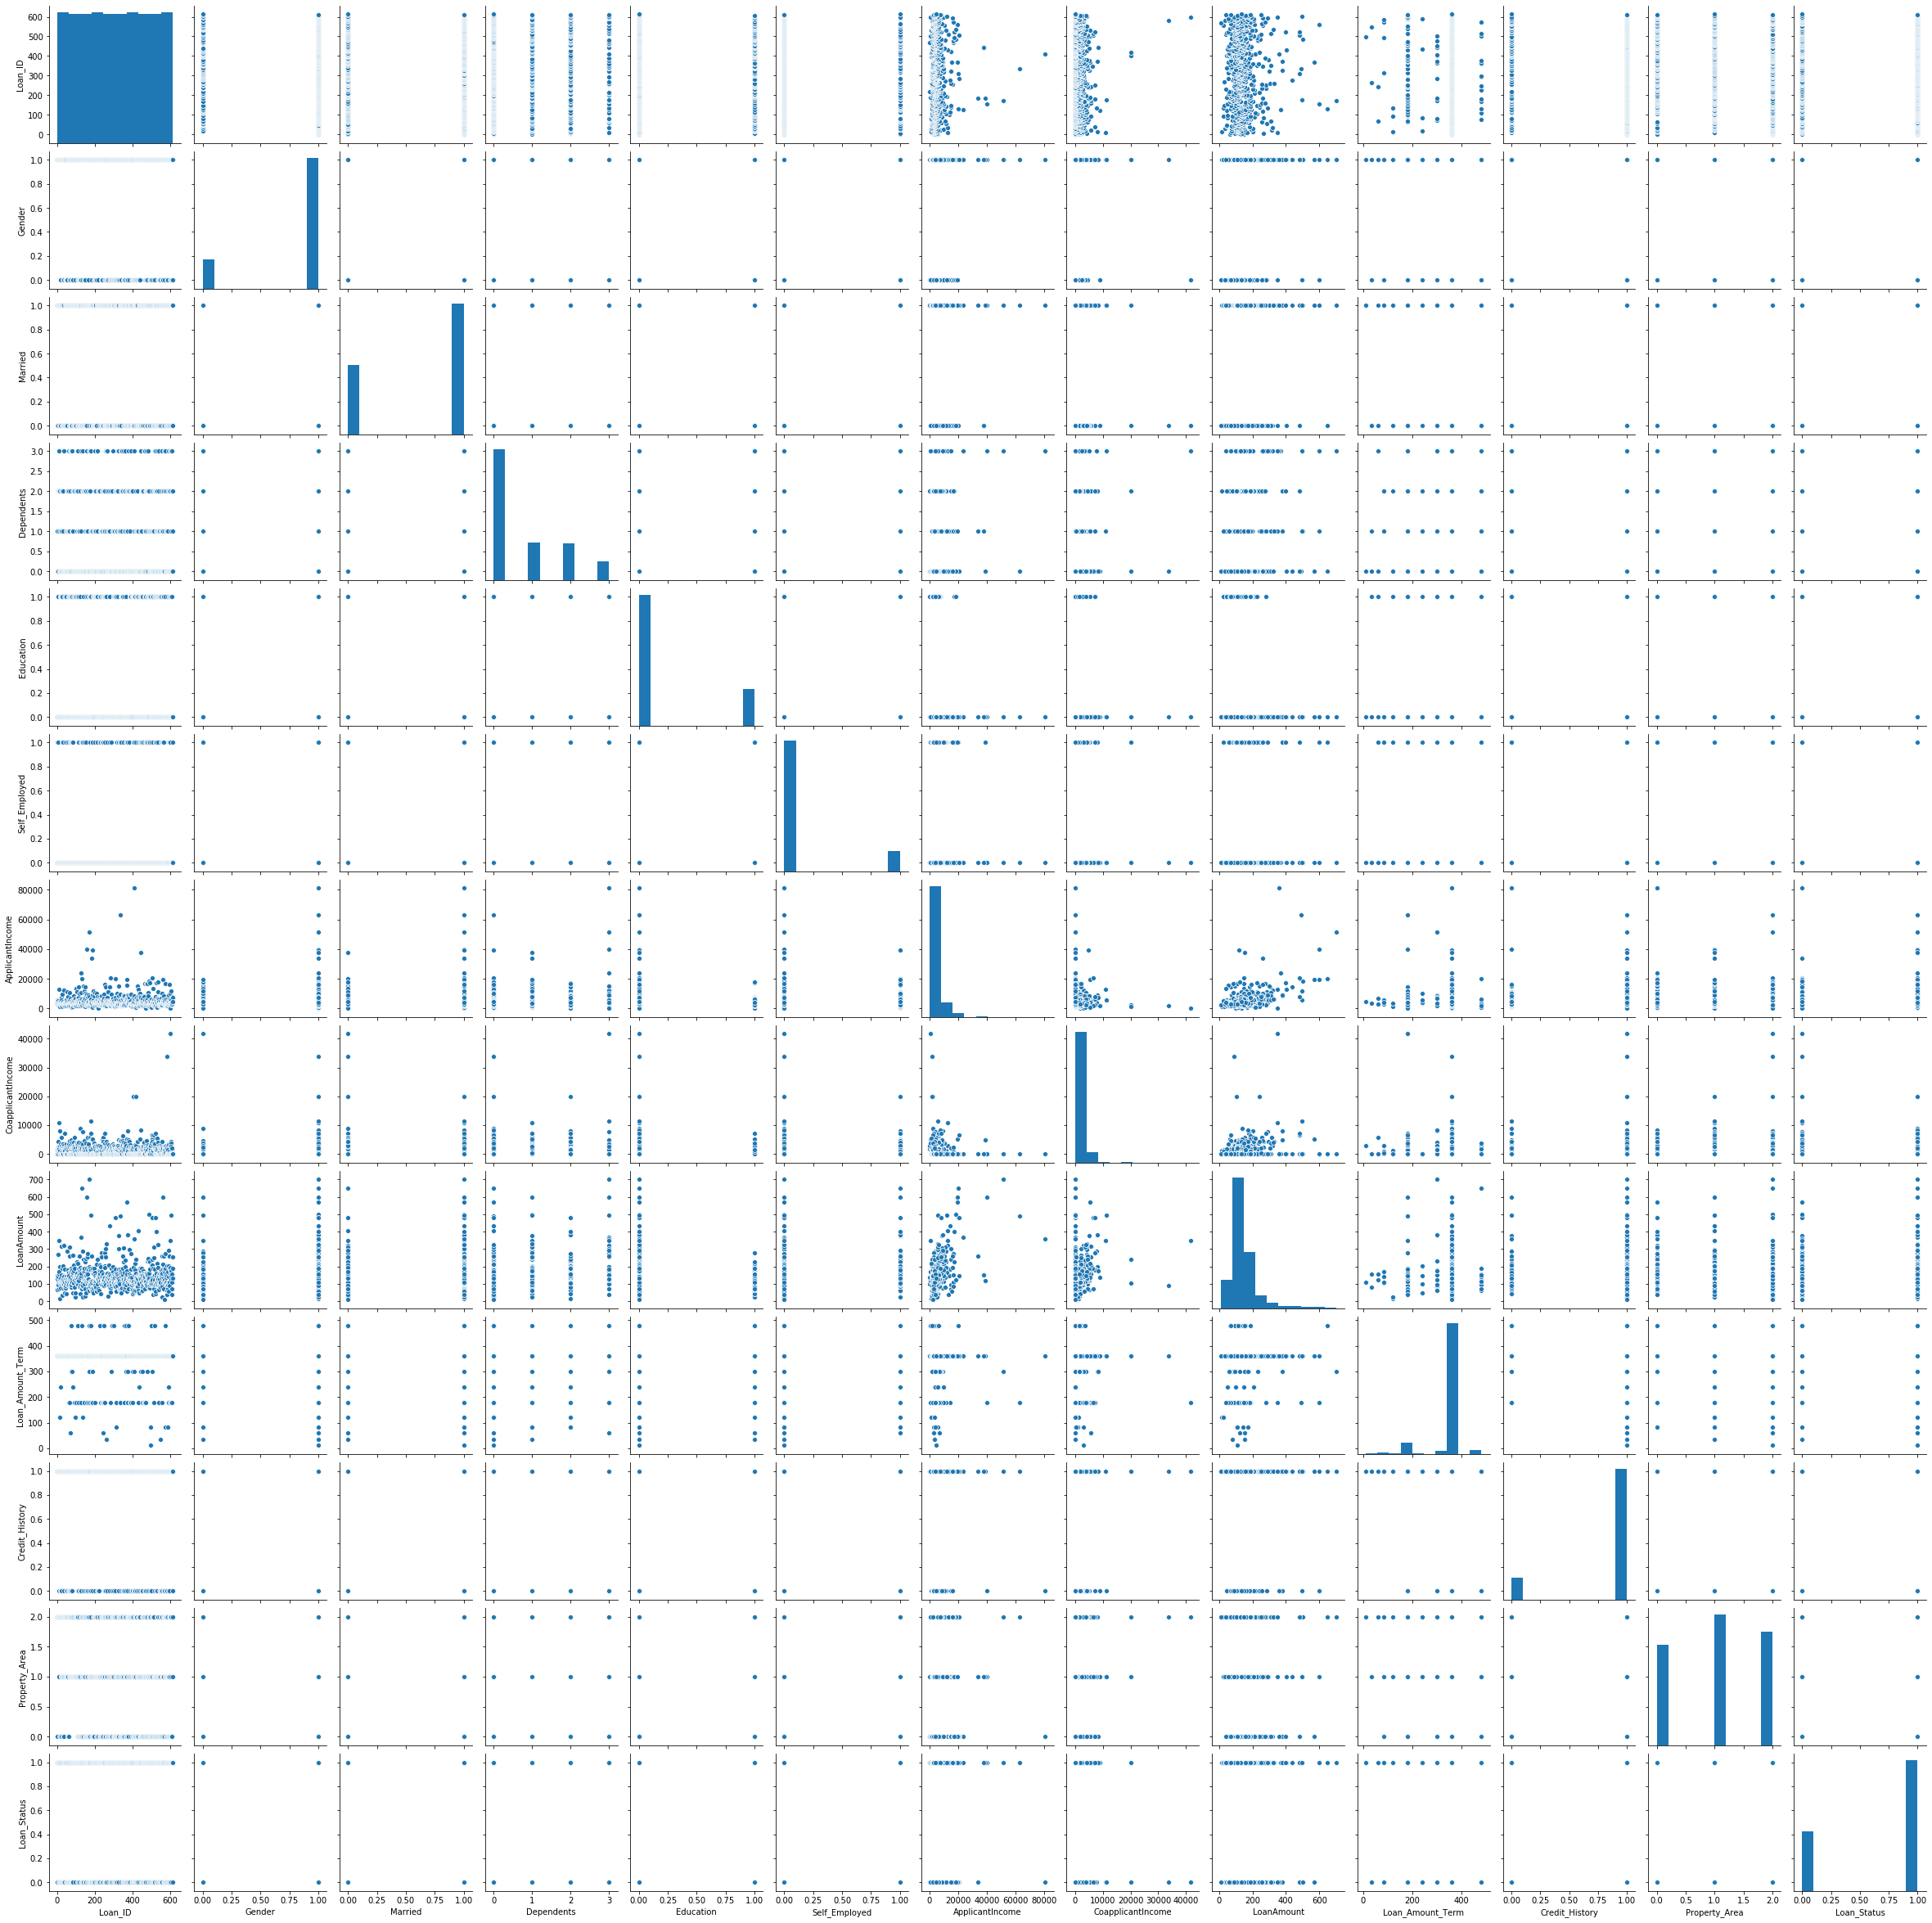

In [36]:
sns.pairplot(df)

In [37]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [38]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [39]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           0.671985
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [40]:
#removing outliers
from scipy.stats import zscore
z =abs(zscore(df))
print(df.shape)
df_fin = df.loc[(z<3).all(axis=1)]
print(df_fin.shape)

(614, 13)
(587, 13)


In [41]:
#split data into x and y
df_x = df_fin.drop(columns=['Loan_Status'])
y = df_fin[['Loan_Status']]

In [42]:
from sklearn import preprocessing 
sc = preprocessing.StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [43]:
x.skew()

Loan_ID              0.000640
Gender              -1.665014
Married             -0.634128
Dependents           0.699527
Education            1.345024
Self_Employed        2.213013
ApplicantIncome      0.522044
CoapplicantIncome   -0.197133
LoanAmount           0.026725
Loan_Amount_Term    -2.125652
Credit_History      -1.985260
Property_Area       -0.054364
dtype: float64

In [44]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve , auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [45]:
def max_acc_score(regr, df_x, y):
    max_acc_score= 0 
    for i in range(42,101):
        r_state = i
        train_x,test_x, train_y,test_y = train_test_split(x,y, random_state = r_state, test_size=0.20)
        regr.fit(train_x,train_y)
        pred = regr.predict(test_x)
        acc_score = accuracy_score(pred, test_y)
        print("The accuraccy score for : ",r_state , "is : ", acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state = r_state
    print("max accuracy score coreesponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [46]:
#test Logistic Regression model
from sklearn.linear_model import LogisticRegression 
lg = LogisticRegression()
r_state = max_acc_score(lg, x, y)

The accuraccy score for :  42 is :  0.7966101694915254
The accuraccy score for :  43 is :  0.8305084745762712
The accuraccy score for :  44 is :  0.864406779661017
The accuraccy score for :  45 is :  0.8389830508474576
The accuraccy score for :  46 is :  0.7203389830508474
The accuraccy score for :  47 is :  0.8135593220338984
The accuraccy score for :  48 is :  0.7796610169491526
The accuraccy score for :  49 is :  0.788135593220339
The accuraccy score for :  50 is :  0.847457627118644
The accuraccy score for :  51 is :  0.7796610169491526
The accuraccy score for :  52 is :  0.847457627118644
The accuraccy score for :  53 is :  0.8813559322033898
The accuraccy score for :  54 is :  0.8389830508474576
The accuraccy score for :  55 is :  0.8389830508474576
The accuraccy score for :  56 is :  0.847457627118644
The accuraccy score for :  57 is :  0.8050847457627118
The accuraccy score for :  58 is :  0.8135593220338984
The accuraccy score for :  59 is :  0.8050847457627118
The accuraccy s

In [47]:
train_x,test_x, train_y,test_y = train_test_split(x,y, random_state = 70, test_size=0.20)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(469, 12)
(118, 12)
(469, 1)
(118, 1)


In [48]:
#Using GridSearchCV to select best parameter
from sklearn.model_selection import GridSearchCV
lg = LogisticRegression()
parameters = {'penalty':['l1','l2']}
gd= GridSearchCV(lg,parameters)
gd.fit(train_x, train_y)
gd.best_params_

{'penalty': 'l2'}

In [49]:
#Using SVC
sv = SVC()
parameters = {'kernel':('linear','rbf','poly'),'C':[1,10]}
gd= GridSearchCV(sv,parameters)
gd.fit(train_x, train_y)
gd.best_params_

{'C': 1, 'kernel': 'linear'}

In [50]:
#best for Decision Tree
dtc = DecisionTreeClassifier()
parameters = {'criterion':('gini','entropy')}
gd= GridSearchCV(dtc,parameters)
gd.fit(train_x, train_y)
gd.best_params_

{'criterion': 'gini'}

In [51]:
#best for KNN
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[1,10]}
gd= GridSearchCV(knn,parameters)
gd.fit(train_x, train_y)
gd.best_params_

{'n_neighbors': 10}

In [52]:
#Tessting all required model with best parameter calculated
model= []
score=[]
cvs=[]

for i in [LogisticRegression(penalty='l2'),SVC(C=1 , kernel='linear'),KNeighborsClassifier(n_neighbors=10),
          DecisionTreeClassifier(criterion='gini'), GaussianNB()]:
    k=i
    model.append(i)
    print("\n")
    print("The model calculations for ",i , "are:")
    k.fit(train_x,train_y)
    k.score(train_x,train_y)
    predict= k.predict(test_x)
    print(predict)
    AS = accuracy_score(predict, test_y)
    print("Accuracy score ",AS)
    score.append(AS)
    cv_score = cross_val_score(k,x,y,cv=5, scoring="accuracy").mean()
    print("The CV score is ", cv_score)
    cvs.append(cv_score)
    print("")
    cm = confusion_matrix(predict, test_y)
    print(cm)
    print("")
    print(classification_report(predict, test_y))
    print("\n")



The model calculations for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) are:
[1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1]
Accuracy score  0.8898305084745762
The CV score is  0.8160654787773431

[[25  0]
 [13 80]]

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        25
           1       1.00      0.86      0.92        93

    accuracy                           0.89       118
   macro avg       0.83      0.93      0.86       118
weighted avg       0.93      0.89 

In [53]:
result = pd.DataFrame({'Model':['LogisticRegression','SVC','KNeighborsClassifier','DecisionTreeClassifier','GaussianNB'],'Accuracy_score':score
                      , 'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,LogisticRegression,0.889831,0.816065
1,SVC,0.881356,0.816065
2,KNeighborsClassifier,0.855932,0.802434
3,DecisionTreeClassifier,0.728814,0.717297
4,GaussianNB,0.881356,0.812647


In [54]:
#Since Logistic Regression give best result
lg = LogisticRegression()
lg.fit(train_x, train_y)
pred= lg.predict(test_x)
print(pred)
print("accuracy score",accuracy_score(pred, test_y))
print("CV score as ",cross_val_score(k,x,y,cv=5, scoring="accuracy").mean())

[1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1]
accuracy score 0.8898305084745762
CV score as  0.8126466753585397


So accuracy score is .889 and CV score is  = .81 

In [55]:
from sklearn.externals import joblib
joblib.dump(lg, 'LoanPredictionDataSet.pkl')

['LoanPredictionDataSet.pkl']